In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Später für die Modelle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
file_path = "../LiveClient/extract_Tursun_game13.json"
with open(file_path, "r") as file:
    json_data = json.load(file)

player_stats = []
for entry in json_data:
    data = entry.get("data", {})
    active_player = data.get("activePlayer", {})
    stats = active_player.get("championStats", {})
    stats["timestamp"] = entry.get("timestamp")
    player_stats.append(stats)
# Damit es nicht mehrere Einkapslungen gibt --> Später erweitern auf weitere Feature

Erstellung des DataFrames erstmal mit kleiner Menge, damit wir nicht auf Speicherprobleme stoßen

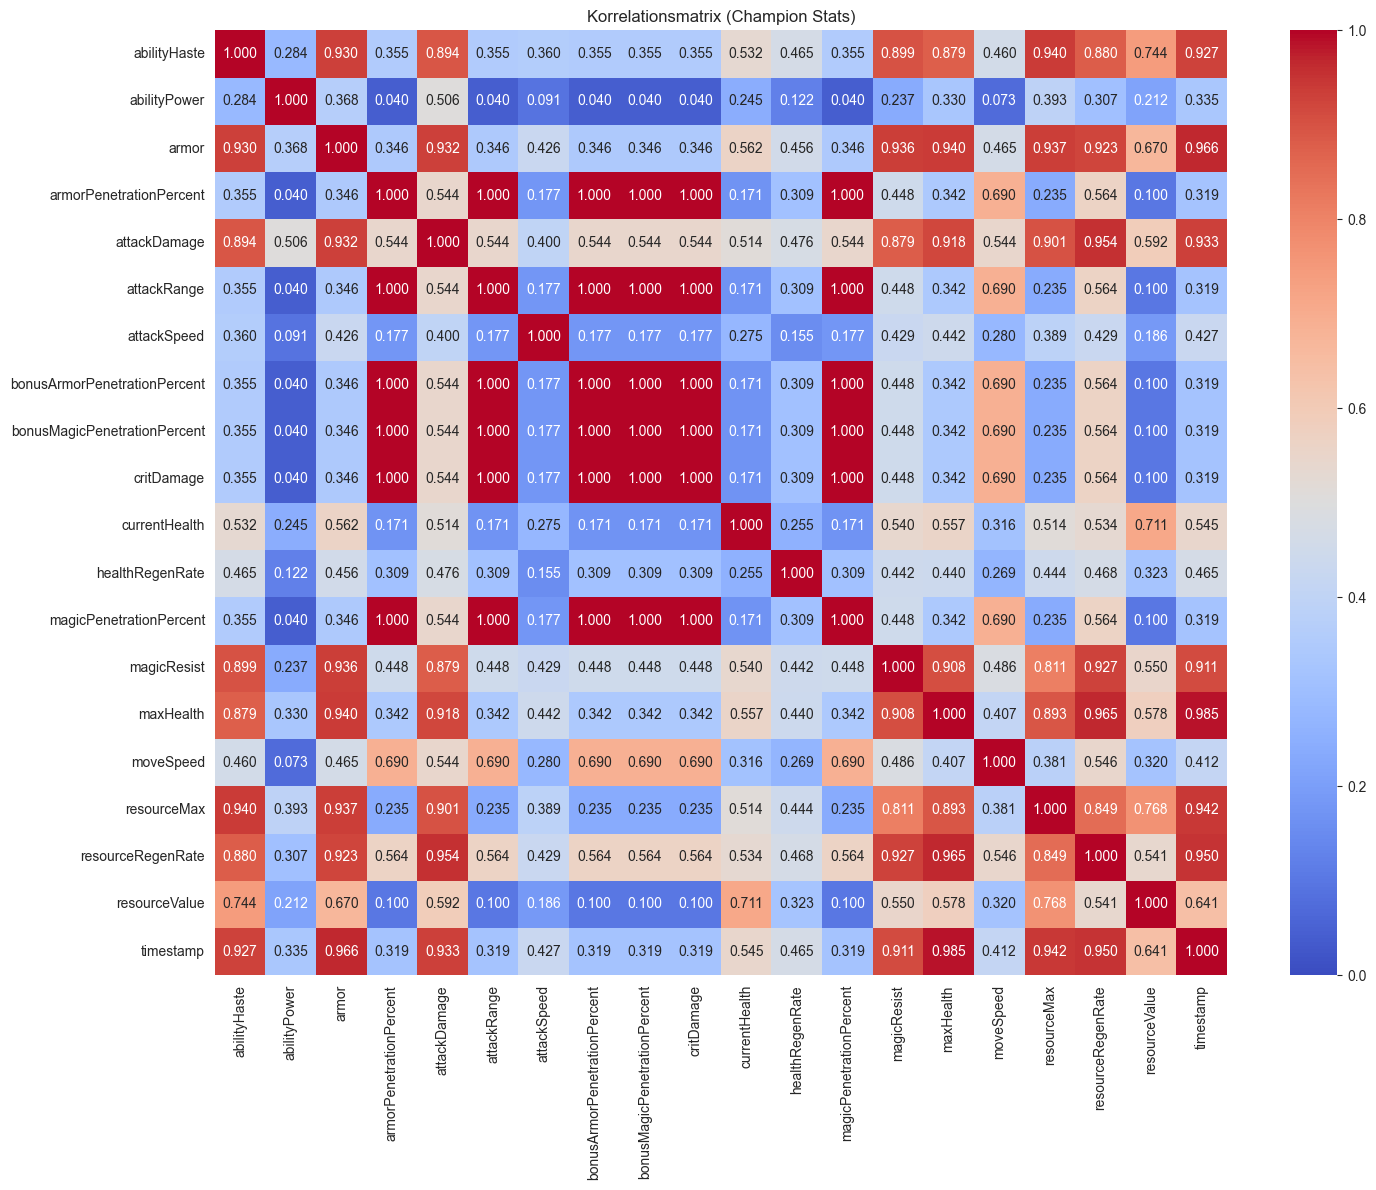

In [14]:
df = pd.DataFrame(player_stats)

df = df.loc[:, df.apply(pd.Series.nunique) > 1]  # Best Practice damit keine konstanten aufgenommen werden.

# Das Plotten der Korrelationsmatrix
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation,
            annot=True,
            cmap="coolwarm",
            vmin=0,
            vmax=1,
            fmt=".3f",
            cbar=True
            )
plt.title("Korrelationsmatrix (Champion Stats)")
plt.tight_layout()
plt.show()

Zum Verständnis der Heatmap:
1. Korrelationswert --> normalerweise -1 - 1, aber hier 0-1
2. Blau ist gut für uns und unser Modell, da fast keine Korrelation --> Unabhängige Features (Diversität, keine Multikollinearität